In [ ]:
#Which is the best in supervised learning in ML

In [64]:
#When a problem comes,we have to identify which algorithm we should apply for it to get maximum accuracy

In [65]:
from sklearn.datasets import load_digits

In [66]:
digits=load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [67]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [68]:
digits.target #target value of image

array([0, 1, 2, ..., 8, 9, 8])

In [69]:
import matplotlib.pyplot as plt

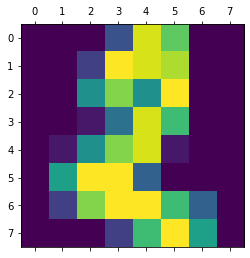

In [70]:
plt.matshow(digits.images[2]) #image of a number

In [71]:
#dataset consist of image of a digit.we are passing image as a predictor to find which image is it is

In [72]:
digits.data.shape

(1797, 64)

In [73]:
#64 is dimension and 1797 is number of images

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [75]:
#RandomForestClassifier is always accurate than Decision Tree

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.2)

In [77]:
#creating a function to get accuracy of each model
def get_score(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

In [78]:
from sklearn.model_selection import StratifiedKFold
folds=StratifiedKFold(n_splits=5)

In [79]:
scores_logistic=[]
scores_svm=[]
scores_knn=[]
scores_rf=[]
scores_dt=[]

In [80]:
for train_index,test_index in folds.split(digits.data,digits.target):
    X_train,X_test,y_train,y_test=digits.data[train_index],digits.data[test_index],digits.target[train_index],digits.target[test_index]
    scores_logistic.append(get_score(LogisticRegression(max_iter=5000),X_train,X_test,y_train,y_test))
    scores_svm.append(get_score(SVC(kernel='linear'),X_train,X_test,y_train,y_test))
    scores_knn.append(get_score(KNeighborsClassifier(n_neighbors=7),X_train,X_test,y_train,y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=100),X_train,X_test,y_train,y_test))
    scores_dt.append(get_score(DecisionTreeClassifier(),X_train,X_test,y_train,y_test))

In [81]:
scores_logistic

[0.925, 0.875, 0.9387186629526463, 0.935933147632312, 0.8969359331476323]

In [82]:
scores_svm

[0.9638888888888889,
 0.9194444444444444,
 0.9665738161559888,
 0.9637883008356546,
 0.924791086350975]

In [83]:
scores_knn

[0.9361111111111111,
 0.9611111111111111,
 0.9693593314763231,
 0.9805013927576601,
 0.9526462395543176]

In [84]:
scores_rf

[0.9333333333333333,
 0.9083333333333333,
 0.9637883008356546,
 0.9665738161559888,
 0.9220055710306406]

In [85]:
scores_dt

[0.7805555555555556,
 0.7444444444444445,
 0.8050139275766016,
 0.8328690807799443,
 0.8022284122562674]